<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Simple_RNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Sine wave without noise**

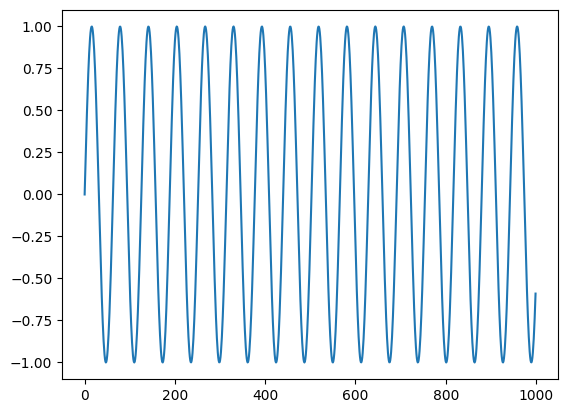

In [65]:
series = np.sin(0.1 * np.arange(1000))

plt.plot(series)
plt.show()

In [66]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t : t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape : ", X.shape, "Y.shape : ", Y.shape)

X.shape :  (990, 10, 1) Y.shape :  (990,)


In [67]:
'''
earlier it was activation = 'relu' and removing the activation
just change the rnn into a linear model
which is working good for our simple usecase

ANN is more generic then CNN and have more flexibility in terms of parameter
but it does not mean that ANN is better then CNN
restricting paramter in some case imporve the performance of our model
'''

i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.SimpleRNN(15 , activation=None)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(i , x)
model.compile(
    loss='mse',
    optimizer = tf.keras.optimizers.Adam(0.001)
)

r = model.fit(
    X[: -N//2], Y[: -N//2],
    epochs = 80,
    validation_data= (X[-N//2 :], Y[-N//2 :])
)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.4533 - val_loss: 0.0603
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0481 - val_loss: 6.2760e-04
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 9.0096e-04
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5660e-04 - val_loss: 5.3829e-04
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5593e-04 - val_loss: 1.1920e-04
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8582e-05 - val_loss: 1.9064e-05
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2054e-05 - val_loss: 2.9111e-06
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3532e-06 - val_loss: 5.7524e-07
Epoch 9/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9128e-07 - val_loss: 1.2034e-07
Epoch 10/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9224e-08 - val_loss: 2.6158e-08
Epoch 11/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6739e-08 - val_loss: 6.0027e-09
E

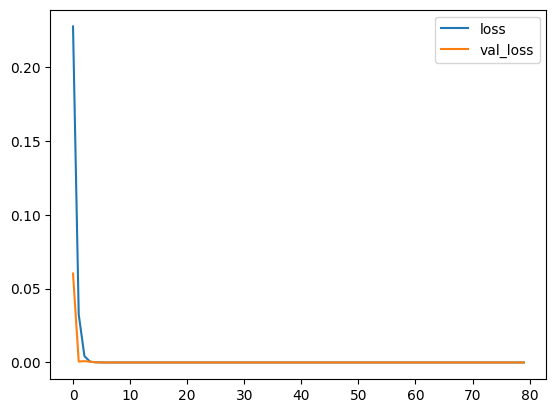

In [68]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [55]:
#wrong forcast

validation_target = Y[-N//2 :]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1 , -1 , 1))[0, 0]
  i += 1
  validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

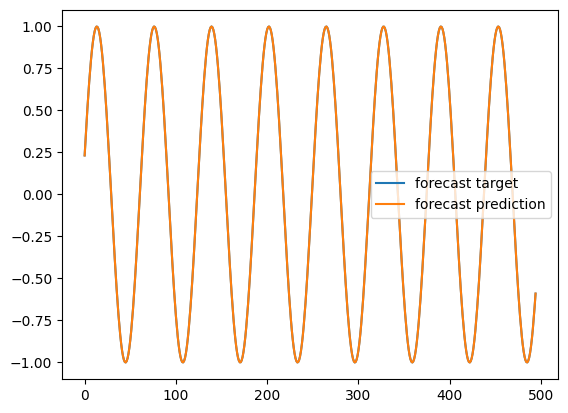

In [56]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [69]:
#correct way

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N // 2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1, 1))[0,0]
    validation_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

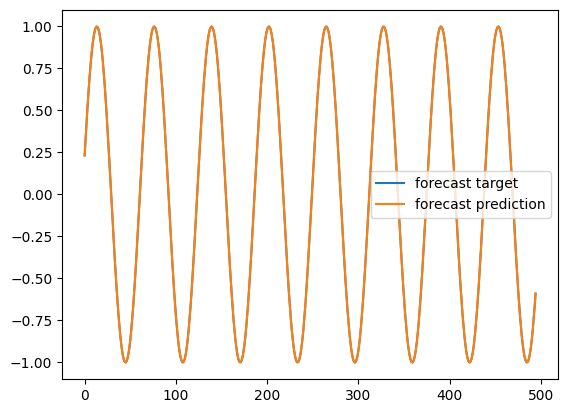

In [70]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# **Sine Wave with Noise**

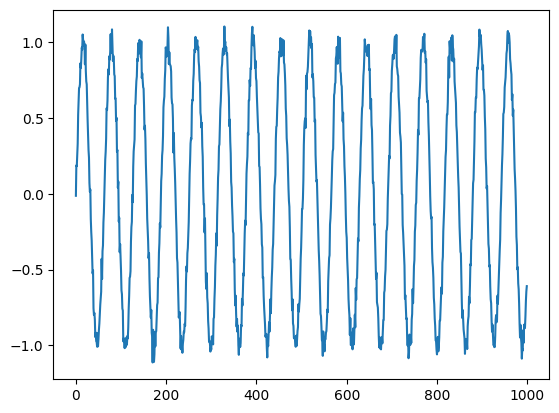

In [87]:
series = np.sin(0.1 * np.arange(1000)) + np.random.randn(1000) * 0.05

plt.plot(series)
plt.show()

In [88]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t : t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape : ", X.shape, "Y.shape : ", Y.shape)

X.shape :  (990, 10, 1) Y.shape :  (990,)


In [89]:
i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.SimpleRNN(20 , activation='relu')(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(i , x)
model.compile(
    loss='mse',
    optimizer = tf.keras.optimizers.Adam(0.001)
)

r = model.fit(
    X[: -N//2], Y[: -N//2],
    epochs = 80,
    validation_data= (X[-N//2 :], Y[-N//2 :])
)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.2789 - val_loss: 0.1150
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0794 - val_loss: 0.0178
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - val_loss: 0.0146
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0094
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 9/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 10/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 11/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 12/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - val_l

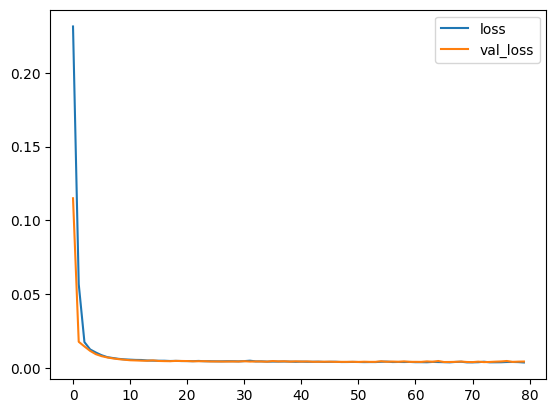

In [90]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [91]:
#wrong forcast

validation_target = Y[-N//2 :]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1 , -1 , 1))[0, 0]
  i += 1
  validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

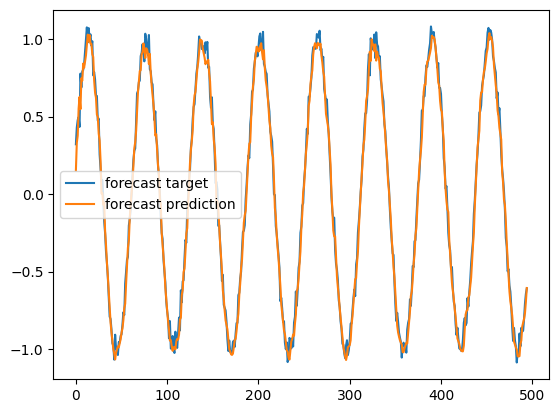

In [92]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [93]:
#correct way

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N // 2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1, 1))[0,0]
    validation_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

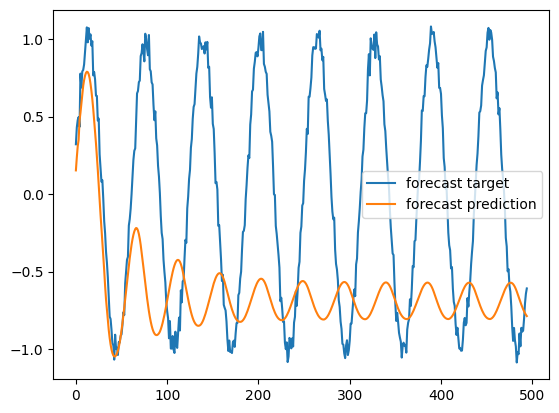

In [94]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()